In [16]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import pandas as pd                                 # Data Frame

import matplotlib.pyplot as plt                     # Basic visualisation
import seaborn as sns                               # Advanced data visualisation

from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

In [17]:
df = pd.read_csv('https://raw.githubusercontent.com/jdecorte/machinelearning/main/datasets/wdbc.csv')
# !! it is really important to give each of the columns an (appropriate) name, 
# otherwise you will get an error: all-features-must-be-in-0-9-or-10-0
# https://stackoverflow.com/questions/65789613/all-features-must-be-in-0-9-or-10-0
df.columns = ['id','diagnosis','radius','texture','perimeter','area','smoothness','compactness','concavity','concave points','symmetry','fractal dimension','radius_std','texture_std','perimeter_std','area_std','smoothness_std','compactness_std','concavity_std','concave points_std','symmetry_std','fractal dimension_std','radius_lg','texture_lg','perimeter_lg','area_lg','smoothness_lg','compactness_lg','concavity_lg','concave points_lg','symmetry_lg','fractal dimension_lg']
df.head()

,id,diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,...,radius_lg,texture_lg,perimeter_lg,area_lg,smoothness_lg,compactness_lg,concavity_lg,concave points_lg,symmetry_lg,fractal dimension_lg
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [18]:
mapdict = {'M':0,'B':1}
df['diagnosis'] = df['diagnosis'].map(mapdict)
df.head()

,id,diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,...,radius_lg,texture_lg,perimeter_lg,area_lg,smoothness_lg,compactness_lg,concavity_lg,concave points_lg,symmetry_lg,fractal dimension_lg
0,842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,0,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [19]:
X = df.drop(['id','diagnosis'], axis=1)
y = df['diagnosis']

## Standardisation
1. Wat zijn de numerieke kolommen? 
2. Gebruik een ColumnTransformer om standaardisatie (scaling) toe te passen.

In [20]:
numerical_ix = X.select_dtypes(include=['int32','int64','float64']).columns
numerical_ix

Index(['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness',
       'concavity', 'concave points', 'symmetry', 'fractal dimension',
       'radius_std', 'texture_std', 'perimeter_std', 'area_std',
       'smoothness_std', 'compactness_std', 'concavity_std',
       'concave points_std', 'symmetry_std', 'fractal dimension_std',
       'radius_lg', 'texture_lg', 'perimeter_lg', 'area_lg', 'smoothness_lg',
       'compactness_lg', 'concavity_lg', 'concave points_lg', 'symmetry_lg',
       'fractal dimension_lg'],
      dtype='object')

In [21]:
from sklearn.pipeline import Pipeline

col_transform = ColumnTransformer(transformers=[('minmax_scaler',MinMaxScaler(), numerical_ix)])

## Model bouwen

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

In [23]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(426, 30)
(142, 30)
(426,)
(142,)


In [24]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

C:\Users\dylan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [25]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(log_reg,X_train,y_train,scoring='accuracy',cv=3))

C:\Users\dylan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dylan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/m

0.9413145539906104

Wat zijn de coëfficienten en wat is het snijpunt?
* De coëfficienten stellen de features voor.

In [27]:
snijpunt = log_reg.intercept_

In [28]:
coefArr = log_reg.coef_

## Confusion matrix

C:\Users\dylan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dylan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/m

Text(91.68, 0.5, 'Actual class')

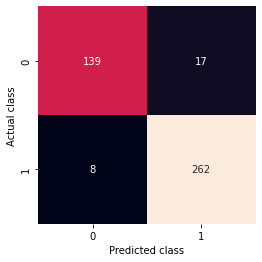

In [29]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(log_reg,X_train,y_train,cv=3)

from sklearn.metrics import  confusion_matrix
conf_mx = confusion_matrix(y_train,y_train_pred)
labels = ['0','1']
cf = sns.heatmap(conf_mx,square=True, annot=True, fmt='d', cbar=False, xticklabels=labels, yticklabels=labels)
cf.set_xlabel('Predicted class')
cf.set_ylabel('Actual class')